In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import espra, plot_ellipse, dopioe, moca


In [2]:
width=500
x = np.linspace(-width // 2, width // 2, 101)
y = np.linspace(-width // 2, width // 2, 101)
X, Y = np.meshgrid(x, y, indexing='ij')
psi0 = 200
Rc = 2
xc, yc = 0, 0 
q11, q12, q22 = .002, 0.0, .002

rhox = 2*q11*(X-xc) + 2*q12*(Y-yc)
rhoy = 2*q22*(Y-yc) + 2*q12*(X-xc)
rho = q11*(X-xc)**2 + q12*(X-xc)*(Y-yc) + q22*(Y-yc)**2

u =  psi0/Rc**2 * rhoy * np.exp(-1/Rc**2 * rho)
v = -psi0/Rc**2 * rhox * np.exp(-1/Rc**2 * rho)

df_res = pd.DataFrame(columns=['xc', 'yc', 'w', 'Q', 'Rc', 'psi0', 'q'])

df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': np.nan, 'Q': np.nan, 'Rc': Rc, 'psi0': psi0, 'q': np.array([[q11, q12], [q12, q22]])}


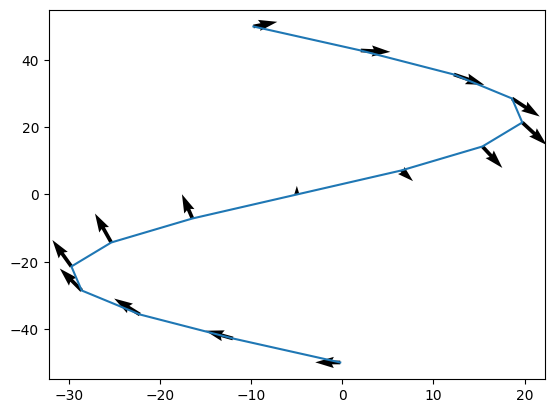

In [3]:
y_squ = np.linspace(-50, 50, 15)
x_squ = 25*np.sin(y_squ/15) - 5

plt.plot(x_squ, y_squ)

from scipy.interpolate import RegularGridInterpolator
interp_u = RegularGridInterpolator((y, x), u.T)
interp_v = RegularGridInterpolator((y, x), v.T)
points = np.vstack([y_squ, x_squ]).T
u_squ = interp_u(points)
v_squ = interp_v(points)

plt.quiver(x_squ, y_squ, u_squ, v_squ)



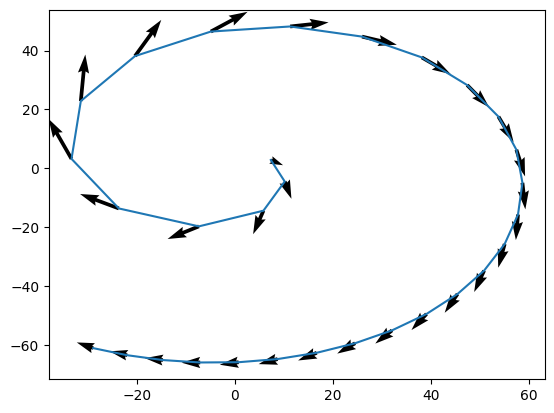

In [4]:
# drifter
N = 1
x_d = np.random.uniform(-10, 10, N)
y_d = np.random.uniform(-10, 10, N)

# Simulation params
dt = 5.2
steps = 30

trajectories_x = [x_d.copy()]
trajectories_y = [y_d.copy()]
trajectories_u = [np.full(N, np.nan)]
trajectories_v = [np.full(N, np.nan)]

for _ in range(steps):
    points = np.vstack([y_d, x_d]).T
    ud = interp_u(points)
    vd = interp_v(points)

    x_d += ud * dt
    y_d += vd * dt

    trajectories_x.append(x_d.copy())
    trajectories_y.append(y_d.copy())
    trajectories_u.append(ud.copy())
    trajectories_v.append(vd.copy())

# Convert to arrays
x_drif = np.array(trajectories_x)[1:]
y_drif = np.array(trajectories_y)[1:]
u_drif = np.array(trajectories_u)[1:]
v_drif = np.array(trajectories_v)[1:]


x_drif = [val[0] for val in x_drif]
y_drif = [val[0] for val in y_drif]
u_drif = [val[0] for val in u_drif]
v_drif = [val[0] for val in v_drif]

plt.plot(x_drif, y_drif)
plt.quiver(x_drif, y_drif, u_drif, v_drif)


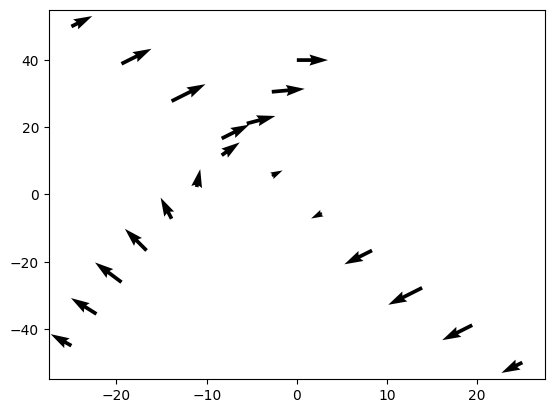

In [5]:
scaling = 5

x_l1 = np.linspace(-5*scaling, 0*scaling, 10)
y_l1 = np.linspace(-9*scaling, 8*scaling, 10)
points = np.vstack([y_l1, x_l1]).T
u_l1 = interp_u(points)
v_l1 = interp_v(points)
plt.quiver(x_l1, y_l1, u_l1, v_l1)

x_l2 = np.linspace(-5*scaling, 5*scaling, 10)
y_l2 = np.linspace(10*scaling, -10*scaling, 10)
points = np.vstack([y_l2, x_l2]).T
u_l2 = interp_u(points)
v_l2 = interp_v(points)
plt.quiver(x_l2, y_l2, u_l2, v_l2)

x_l = np.array(list(x_l1) + list(x_l2))
y_l = np.array(list(y_l1) + list(y_l2))
u_l = np.array(list(u_l1) + list(u_l2))
v_l = np.array(list(v_l1) + list(v_l2))


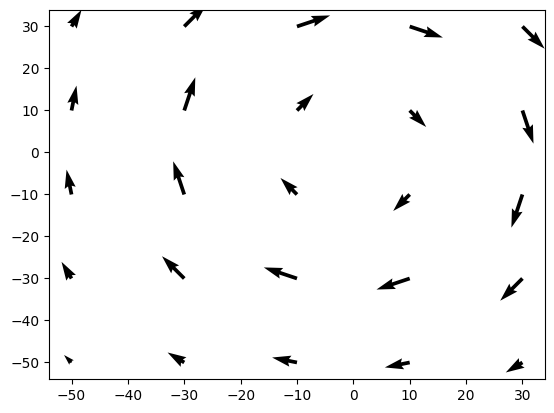

In [6]:
x_p = np.arange(-50, 50, 20)
y_p = np.arange(-50, 50, 20)
x_p, y_p = np.meshgrid(x_p, y_p)
x_p, y_p = x_p.flatten(), y_p.flatten()
points = np.vstack([y_p, x_p]).T
u_p = interp_u(points)
v_p = interp_v(points)
plt.quiver(x_p, y_p, u_p, v_p)


/home/z5297792/UNSW-MRes/MRes/modules/utils.py:349: RuntimeWarning: overflow encountered in exp
  exp_t = np.exp(-rho/Rc**2)
/home/z5297792/UNSW-MRes/MRes/modules/utils.py:349: RuntimeWarning: overflow encountered in exp
  exp_t = np.exp(-rho/Rc**2)
/home/z5297792/UNSW-MRes/MRes/modules/utils.py:349: RuntimeWarning: overflow encountered in exp
  exp_t = np.exp(-rho/Rc**2)


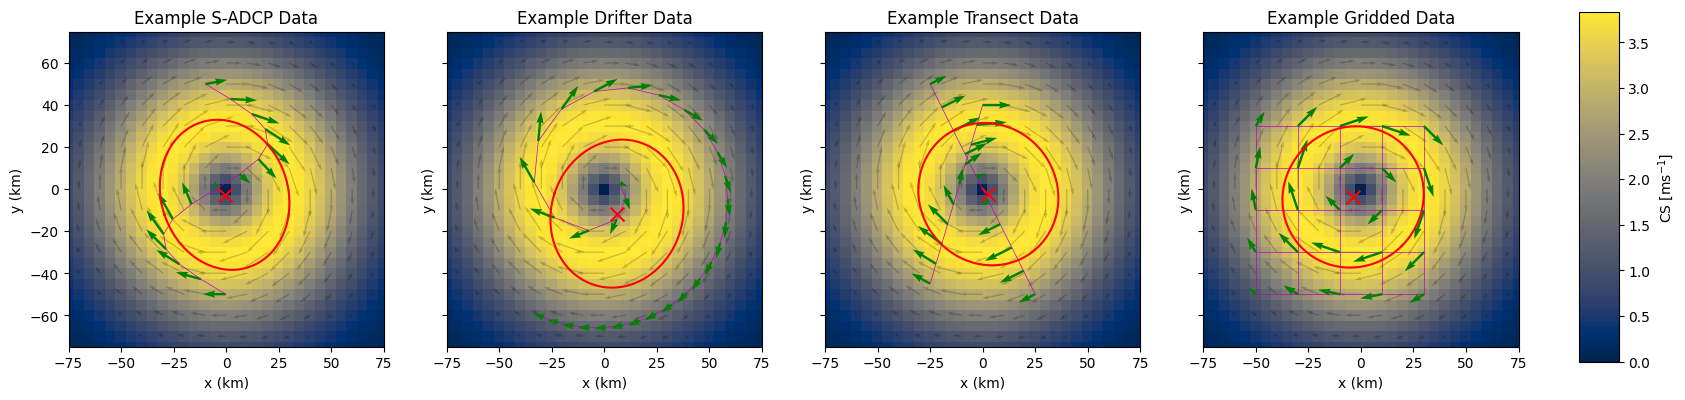

,xc,yc,w,Q,Rc,psi0,q
Control,0.000000,0.000000,NaN,NaN,2.000000,200.000000,"[[0.002, 0.0], [0.0, 0.002]]"
T1,-0.705611,-2.719653,-0.178881,"[[-0.05124028549979285, -0.00492136997064843],...",1.592822,1181.525970,"[[-0.00010439860295849443, -1.0640610685706298..."
T2,5.974810,-11.673219,-0.081019,"[[-0.022394353394241746, 0.0015453262652200782...",NaN,NaN,"[[nan, nan], [nan, nan]]"
T3,2.701556,-2.384820,-0.167631,"[[-0.04259569661585966, -0.0023353100424861406...",1.835254,471.384068,"[[-0.0002520843137094562, -1.7611650212840094e..."
T4,-3.727219,-3.727219,-0.132402,"[[-0.03310038168021147, 0.0014552266142257957]...",1.905406,424.278177,"[[-0.00022801818220011749, 1.3204731346662878e..."


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# your data arrays: x, y, u, v, x_squ, y_squ, u_squ, v_squ, x_drif, y_drif, u_drif, v_drif,
# x_l1, y_l1, u_l1, v_l1, x_l2, y_l2, u_l2, v_l2, x_p, y_p, u_p, v_p, etc.

fig, axs = plt.subplots(1, 4, figsize=(20, 5), constrained_layout=False, sharey=True, sharex=True)

cmap = 'cividis'
spacing, scale, width = 2, 40, 0.004
wid = 1.9

# ---- plot background pcolor + quiver on each axis ----
for ax in axs:
    pc = ax.pcolor(x, y, np.hypot(u, v).T, cmap=cmap)
    ax.quiver(
        x[::spacing], y[::spacing],
        u[::spacing, ::spacing].T, v[::spacing, ::spacing].T,
        alpha=0.2, scale=scale, width=width, zorder=1
    )
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-75, 75)
    ax.set_ylim(-75, 75)
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')

# ---- Panel 1: Example S-ADCP Data ----
axs[0].plot(x_squ, y_squ, 'm', linewidth=.5)
axs[0].quiver(x_squ, y_squ, u_squ, v_squ, scale=scale*1, width=width*wid, color='g')
xc, yc, w, Q, Rc, psi0, q = espra(x_squ, y_squ, u_squ, v_squ)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'Q': Q, 'Rc': Rc, 'psi0': psi0, 'q': q}
x_ell, y_ell = plot_ellipse(Q, (xc, yc), scale=40)
axs[0].plot(x_ell, y_ell, 'r')
axs[0].scatter(xc, yc, marker='x', s=100, color='r')
axs[0].set_title('Example S-ADCP Data')

# ---- Panel 2: Example Drifter Data ----
axs[1].plot(x_drif, y_drif, 'm', linewidth=.5)
axs[1].quiver(x_drif, y_drif, u_drif, v_drif, scale=scale*1, width=width*wid, color='g', zorder=3)
xc, yc, w, Q, Rc, psi0, q = espra(x_drif, y_drif, u_drif, v_drif)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'Q': Q, 'Rc': Rc, 'psi0': psi0, 'q': q}
axs[1].scatter(xc, yc, marker='x', s=100, color='r')
x_ell, y_ell = plot_ellipse(Q, (xc, yc), scale=40)
axs[1].plot(x_ell, y_ell, 'r', zorder=3)
axs[1].set_title('Example Drifter Data')

# ---- Panel 3: Example Transect Data ----
axs[2].plot(x_l1, y_l1, 'm', linewidth=.5)
axs[2].plot(x_l2, y_l2, 'm', linewidth=.5)
axs[2].quiver(x_l1, y_l1, u_l1, v_l1, scale=scale*1, width=width*wid, color='g', zorder=3)
axs[2].quiver(x_l2, y_l2, u_l2, v_l2, scale=scale*1, width=width*wid, color='g', zorder=3)
xc, yc, w, Q, Rc, psi0, q = espra(x_l, y_l, u_l, v_l)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'Q': Q, 'Rc': Rc, 'psi0': psi0, 'q': q}
axs[2].scatter(xc, yc, marker='x', s=100, color='r')
x_ell, y_ell = plot_ellipse(Q, (xc, yc), scale=40)
axs[2].plot(x_ell, y_ell, 'r', zorder=3)
axs[2].set_title('Example Transect Data')

# ---- Panel 4: Example Gridded Data ----
# horizontal transects
for i in range(0, 25, 5):
    axs[3].plot([x_p[i], x_p[i+4]], [y_p[i], y_p[i+4]], 'm', linewidth=.5)
# vertical transects
for i in range(5):
    axs[3].plot([x_p[i], x_p[i+20]], [y_p[i], y_p[i+20]], 'm', linewidth=.5)
axs[3].quiver(x_p, y_p, u_p, v_p, scale=scale*1, width=width*wid, color='g', zorder=3)
xc, yc, w, Q, Rc, psi0, q = espra(x_p, y_p, u_p, v_p)
df_res.loc[len(df_res)] = {'xc': xc, 'yc': yc, 'w': w, 'Q': Q, 'Rc': Rc, 'psi0': psi0, 'q': q}
axs[3].scatter(xc, yc, marker='x', s=100, color='r')
x_ell, y_ell = plot_ellipse(Q, (xc, yc), scale=40)
axs[3].plot(x_ell, y_ell, 'r', zorder=3)
axs[3].set_title('Example Gridded Data')

# ---- now place one colorbar to the right of the entire figure ----
# leave room on the right
fig.subplots_adjust(right=0.85)

# [left, bottom, width, height] in figure coords
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
fig.colorbar(pc, cax=cbar_ax, orientation='vertical', label=r'CS [ms$^{-1}$]')

plt.show()

df_res.index = ['Control', 'T1', 'T2', 'T3', 'T4']
df_res

In [8]:
def gaussian_vel_reconstruction(x0, y0, q11, q12, q22, Rc, psi0, X=None, Y=None): 
    
    dx, dy = X - x0, Y - y0
    
    phi   = q11*dx**2 + 2*q12*dx*dy + q22*dy**2
    phi_x = 2*q11*dx  + 2*q12*dy
    phi_y = 2*q22*dy  + 2*q12*dx
    
    # 5) build Gaussian streamfunction with that R
    exp_term = np.exp(-phi / Rc**2)
    psi_x = -phi_x / Rc**2 * exp_term
    psi_y = -phi_y / Rc**2 * exp_term
    
    u = -psi_y * psi0
    v =  psi_x * psi0

    return u, v, X, Y
    

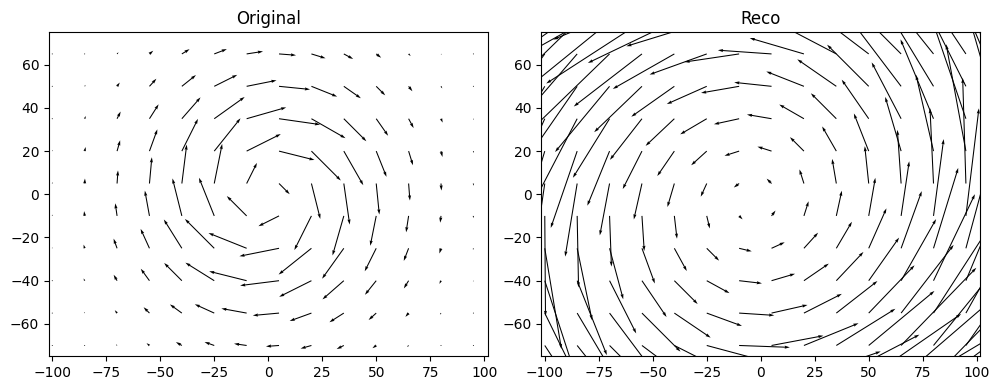

In [9]:
data = df_res.iloc[-1]

spac, scale = 3, 40
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].quiver(
    x[::spac], y[::spac],
    u[::spac, ::spac].T, v[::spac, ::spac].T,
    scale=scale,
)
axs[0].axis('equal')
axs[0].set_xlim(-75, 75)
axs[0].set_ylim(-75, 75)
axs[0].set_title('Original')

u_reco, v_reco, *_ = gaussian_vel_reconstruction(data.xc, data.yc, data.q[0,0], data.q[0,1], data.q[1,1], data.Rc, data.psi0, X, Y)

axs[1].quiver(X[::spac,::spac], Y[::spac,::spac], u_reco[::spac,::spac], v_reco[::spac,::spac], scale=scale)
axs[1].axis('equal')
axs[1].set_xlim(-75, 75)
axs[1].set_ylim(-75, 75)
axs[1].set_title('Reco')

plt.tight_layout()


### DOPIOE

0.0 0.0 -0.3957158220032095 [[-0.09892896  0.        ]
 [ 0.         -0.09892896]] 2.9297640449507982 207.74573235162086 [[-2.92569963e-03 -1.97957158e-20]
 [-1.97957158e-20 -2.92569963e-03]]
0.004087489053301864 -0.0 0.004087489053301864


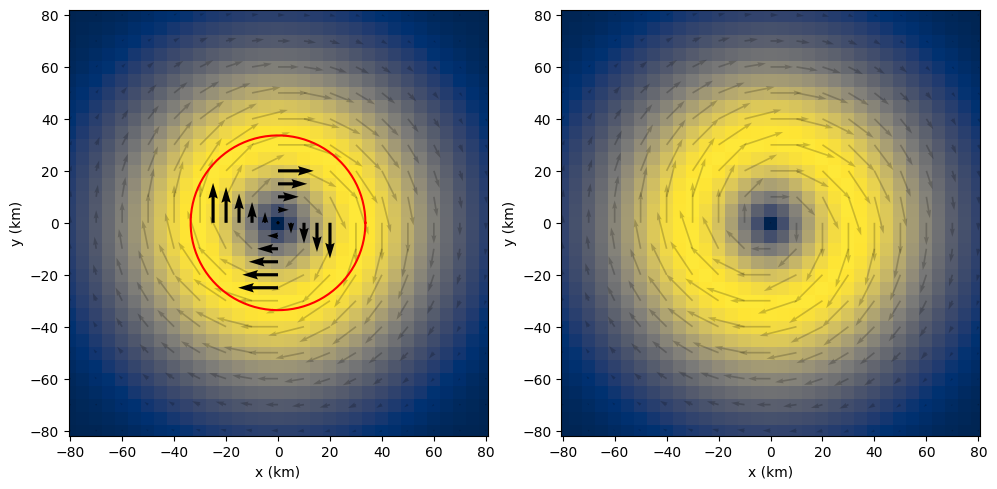

In [21]:
ic, jc, r_idx = 50, 50, 5
x1, y1 = x[ic-r_idx:ic+r_idx], np.array([y[jc]] * len(range(ic-r_idx, ic+r_idx)))
u1, v1 = u[ic-r_idx:ic+r_idx, jc], v[ic-r_idx:ic+r_idx, jc]

x2, y2 = np.array([x[ic]] * len(range(jc-r_idx, jc+r_idx))), y[jc-r_idx:jc+r_idx]
u2, v2 = u[ic, jc-r_idx:jc+r_idx], v[ic, jc-r_idx:jc+r_idx]

xc, yc, w, Q, Rc, psi0, q = dopioe(x1, y1, u1, v1, x2, y2, u2, v2)
print(xc, yc, w, Q, Rc, psi0, q)


s = -Rc**2/psi0
u_reco, v_reco, *_ = gaussian_vel_reconstruction(xc, yc, s*Q[0,0], s*Q[0,1], s*Q[1,1], Rc, psi0, X, Y)
print(s*Q[0,0], s*Q[0,1], s*Q[1,1])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
pc = axs[0].pcolor(x, y, np.hypot(u, v).T, cmap=cmap)
axs[0].quiver(
    x[::spacing], y[::spacing],
    u[::spacing, ::spacing].T, v[::spacing, ::spacing].T,
    alpha=0.2, scale=scale, width=width, zorder=1
)
axs[0].quiver(x1, y1, u1, v1)
axs[0].quiver(x2, y2, u2, v2)

x_ell, y_ell = plot_ellipse(Q, (xc, yc), scale=40)
axs[0].plot(x_ell, y_ell, 'r', zorder=3)
axs[0].axis('equal')
axs[0].set_xlim(-75, 75)
axs[0].set_ylim(-75, 75)
axs[0].set_xlabel('x (km)')
axs[0].set_ylabel('y (km)')

pc = axs[1].pcolor(x, y, np.hypot(u_reco, v_reco).T, cmap=cmap)
axs[1].quiver(
    x[::spacing], y[::spacing],
    u_reco[::spacing, ::spacing].T, v_reco[::spacing, ::spacing].T,
    alpha=0.2, scale=scale, width=width, zorder=1
)
axs[1].axis('equal')
axs[1].set_xlim(-75, 75)
axs[1].set_ylim(-75, 75)
axs[1].set_xlabel('x (km)')
axs[1].set_ylabel('y (km)')
plt.tight_layout()


### MOCA

-0.015767370406219783 -0.0 -0.39571582200320904 [[-0.09892896  0.        ]
 [ 0.         -0.09892896]] 2.990269373616241 207.84633450282485 [[-3.04757276e-03 -3.98635141e-21]
 [-3.98635141e-21  1.90388646e-03]]
0.004256000590499479 -0.0 0.004256000590499479


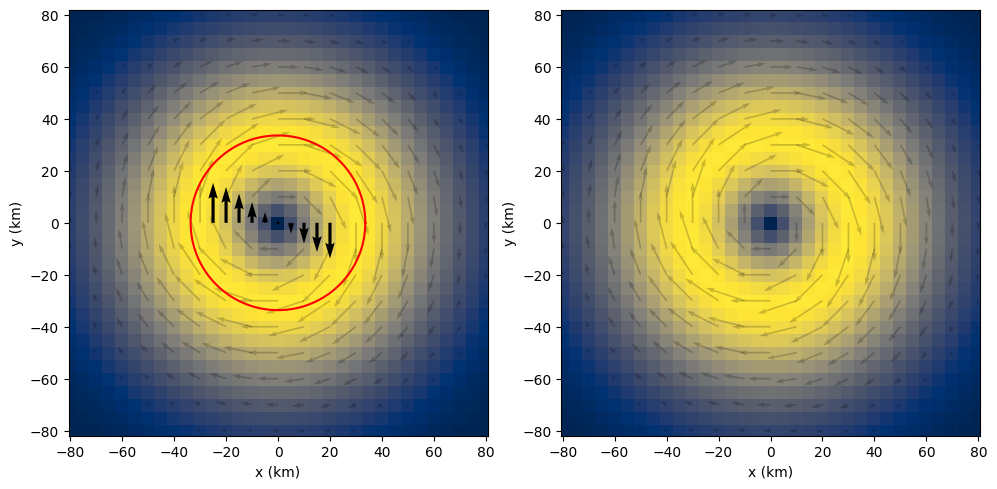

In [22]:
xc, yc, w, Q, Rc, psi0, q = moca(x1-x1[0], u1, v1)
xc += x1[0]
print(xc, yc, w, Q, Rc, psi0, q)

s = -Rc**2/psi0
u_reco, v_reco, *_ = gaussian_vel_reconstruction(xc, yc, s*Q[0,0], s*Q[0,1], s*Q[1,1], Rc, psi0, X, Y)
print(s*Q[0,0], s*Q[0,1], s*Q[1,1])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
pc = axs[0].pcolor(x, y, np.hypot(u, v).T, cmap=cmap)
axs[0].quiver(
    x[::spacing], y[::spacing],
    u[::spacing, ::spacing].T, v[::spacing, ::spacing].T,
    alpha=0.2, scale=scale, width=width, zorder=1
)
axs[0].quiver(x1, y1, u1, v1)

x_ell, y_ell = plot_ellipse(Q, (xc, yc), scale=40)
axs[0].plot(x_ell, y_ell, 'r', zorder=3)
axs[0].axis('equal')
axs[0].set_xlim(-75, 75)
axs[0].set_ylim(-75, 75)
axs[0].set_xlabel('x (km)')
axs[0].set_ylabel('y (km)')

pc = axs[1].pcolor(x, y, np.hypot(u_reco, v_reco).T, cmap=cmap)
axs[1].quiver(
    x[::spacing], y[::spacing],
    u_reco[::spacing, ::spacing].T, v_reco[::spacing, ::spacing].T,
    alpha=0.2, scale=scale, width=width, zorder=1
)
axs[1].axis('equal')
axs[1].set_xlim(-75, 75)
axs[1].set_ylim(-75, 75)
axs[1].set_xlabel('x (km)')
axs[1].set_ylabel('y (km)')
plt.tight_layout()

